<a href="https://colab.research.google.com/github/Basakrana/testing/blob/main/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loan Prediction**

Importing Required Libraries

In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report , accuracy_score , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/loan_data.csv")

In [ ]:
# Show Sample of Data
df.sample(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
28954,27.0,female,Master,54668.0,2,RENT,12800.0,PERSONAL,11.83,0.23,8.0,674,Yes,0
30701,36.0,female,Master,75598.0,14,MORTGAGE,6000.0,VENTURE,12.99,0.08,13.0,712,Yes,0
37206,26.0,female,Bachelor,76306.0,6,MORTGAGE,4422.0,DEBTCONSOLIDATION,9.80,0.06,4.0,656,No,0
21899,29.0,male,Bachelor,60801.0,6,MORTGAGE,1500.0,HOMEIMPROVEMENT,13.11,0.02,6.0,686,Yes,0
38984,30.0,male,High School,115807.0,3,MORTGAGE,6000.0,PERSONAL,10.74,0.05,6.0,642,Yes,0


In [ ]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 45000
Number of Columns : 14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
# Check NaN Value
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


There is no Null value present in the data set


In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
person_age,45000,0,0.0,60
person_gender,45000,0,0.0,2
person_education,45000,0,0.0,5
person_income,45000,0,0.0,33989
person_emp_exp,45000,0,0.0,63
person_home_ownership,45000,0,0.0,4
loan_amnt,45000,0,0.0,4483
loan_intent,45000,0,0.0,6
loan_int_rate,45000,0,0.0,1302
loan_percent_income,45000,0,0.0,64


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

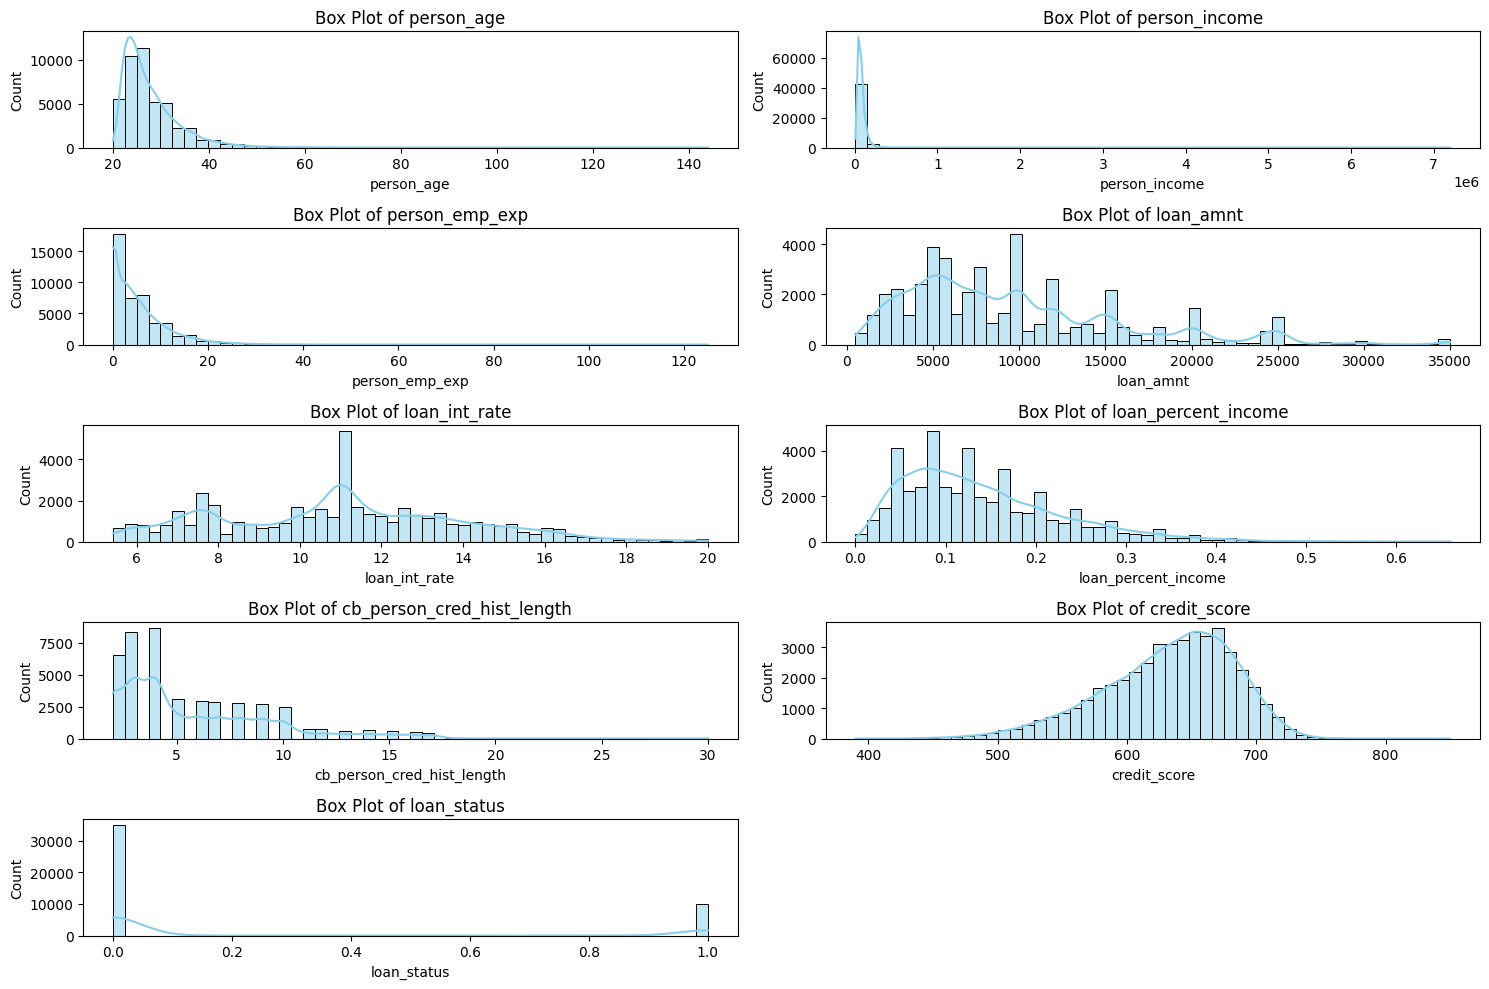

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(x = df[col],kde = True, bins = 50 ,color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

## Key Observations:

person_age – Most applicants are between 20–40 years old, with a few extreme values around 120–140 (likely data errors or outliers).

person_income – Highly skewed; most incomes are below 1 million, with some extreme high earners affecting the scale.

person_emp_exp – Employment experience is concentrated at lower years; a long tail shows a few very experienced individuals.

loan_amnt – Distribution shows many small to medium loans, with a few very large loans as outliers.

loan_int_rate – Relatively uniform with a peak around 11–12%, indicating common interest rates.

loan_percent_income – Most loans represent a small fraction of income; a few applicants have loans that are a significant portion of their income.

cb_person_cred_hist_length – Most individuals have 2–10 years of credit history; a long tail indicates some very long histories.

credit_score – Approximates a normal distribution, peaking around 650–700, which is typical for mid-to-good credit ratings.

loan_status – Highly imbalanced, with a large number of approved (1) and rejected (0) loans visible in the histogram.

Summary:
These distributions help us understand data skewness, outliers, and variable behavior, guiding preprocessing steps such as normalization, outlier treatment, and feature scaling for machine learning models.

In [ ]:
df = df[(df['person_age'] < 66) & (df['person_income'] < 500000)]

Removed the outliers but filtering the dataset based on age less then 65 and income less then 500000 so the the skewness the data will decrease

In [ ]:
df.shape

(44860, 14)

Only 140 Rows is affected

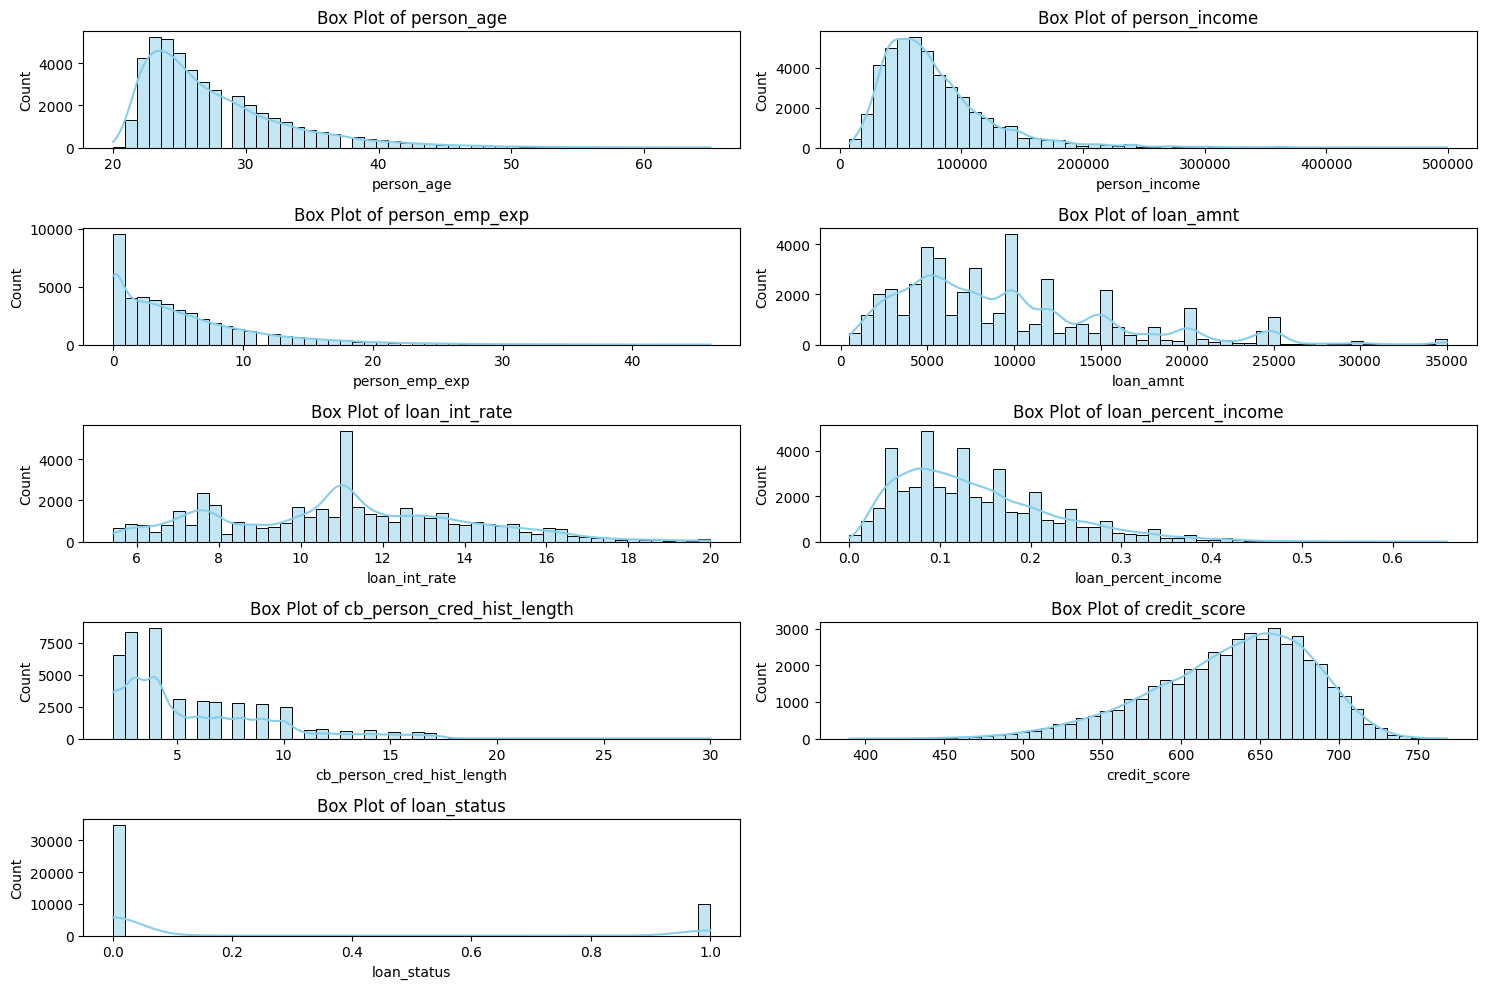

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(x = df[col],kde = True, bins = 50 ,color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

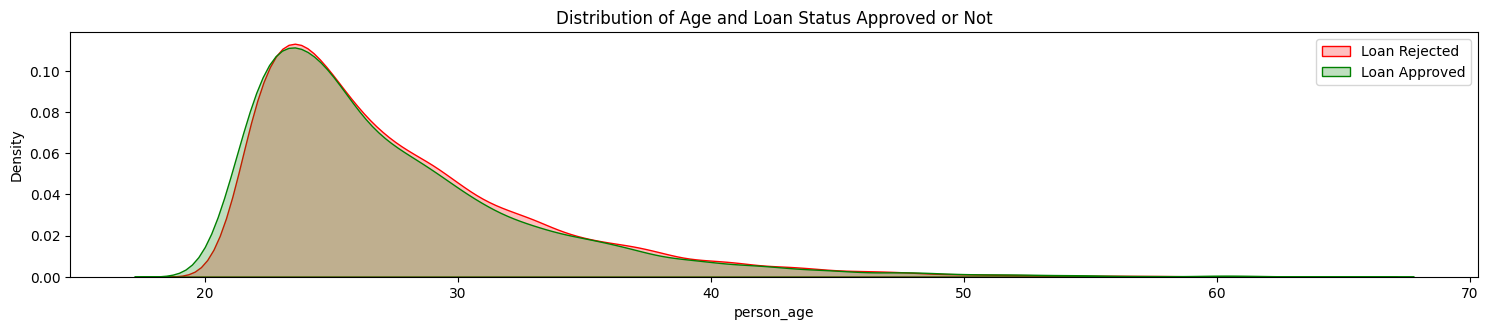

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of Age and Loan Status Approved or Not')
sns.kdeplot(df[(df['loan_status'] == 0)]['person_age'],color='red',fill=True,label='Loan Rejected')
sns.kdeplot(df[(df['loan_status'] == 1)]['person_age'],color='green',fill=True,label='Loan Approved')

plt.legend()
plt.tight_layout()
plt.show()

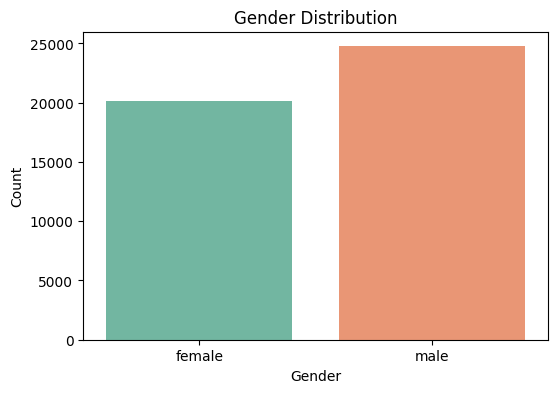

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x='person_gender', data=df, palette='Set2')

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

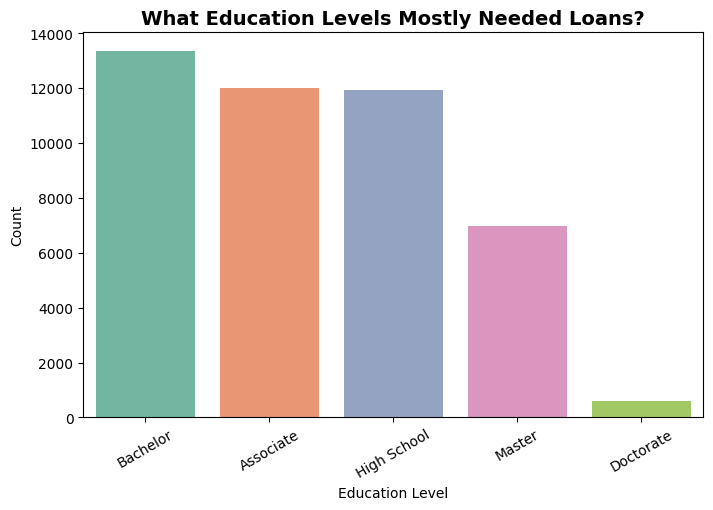

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='person_education',
    order=df['person_education'].value_counts().index,
    palette='Set2'
)

plt.title("What Education Levels Mostly Needed Loans?", fontsize=14, fontweight='bold')
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

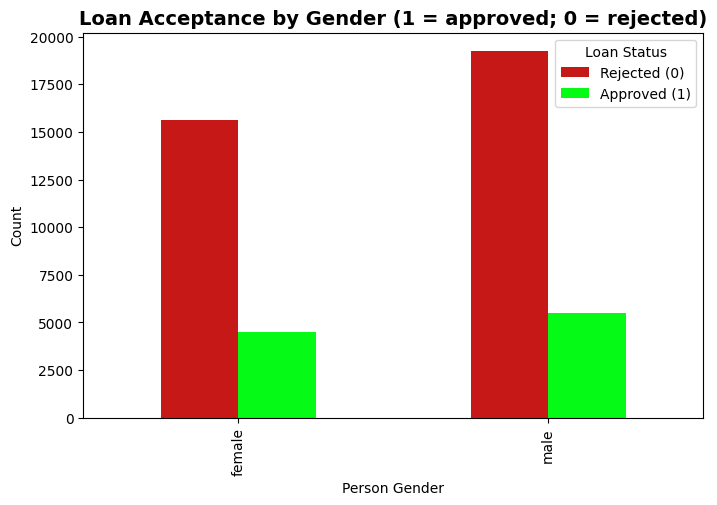

In [ ]:
loan_gender_counts = pd.crosstab(df['person_gender'], df['loan_status'])

# Plot
loan_gender_counts.plot(kind='bar', figsize=(8,5), color=['#c71818','#05fa15'])

plt.title("Loan Acceptance by Gender (1 = approved; 0 = rejected)", fontsize=14, fontweight='bold')
plt.xlabel("Person Gender")
plt.ylabel("Count")
plt.legend(title="Loan Status", labels=["Rejected (0)", "Approved (1)"])
plt.xticks

plt.show()

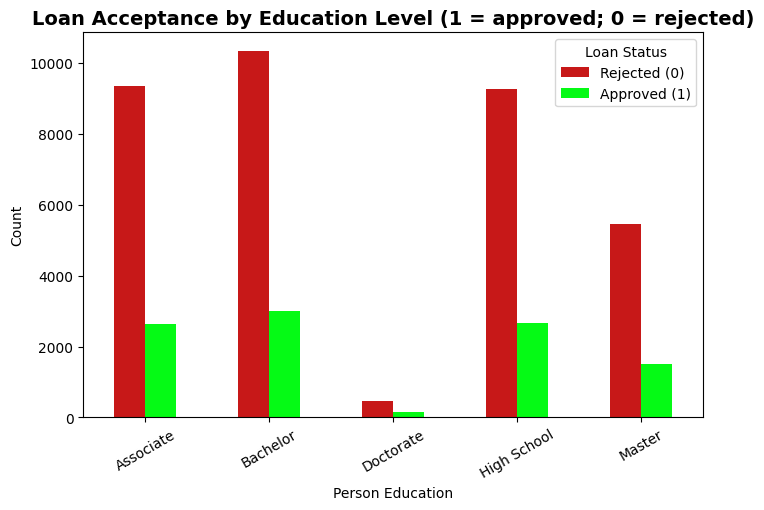

In [ ]:
edu_loan_counts = pd.crosstab(df['person_education'], df['loan_status'])

# Plot grouped bar chart
edu_loan_counts.plot(kind='bar', figsize=(8,5), color=['#c71818','#05fa15'])

plt.title("Loan Acceptance by Education Level (1 = approved; 0 = rejected)", fontsize=14, fontweight='bold')
plt.xlabel("Person Education")
plt.ylabel("Count")
plt.legend(title="Loan Status", labels=["Rejected (0)", "Approved (1)"])
plt.xticks(rotation=30)
plt.show()

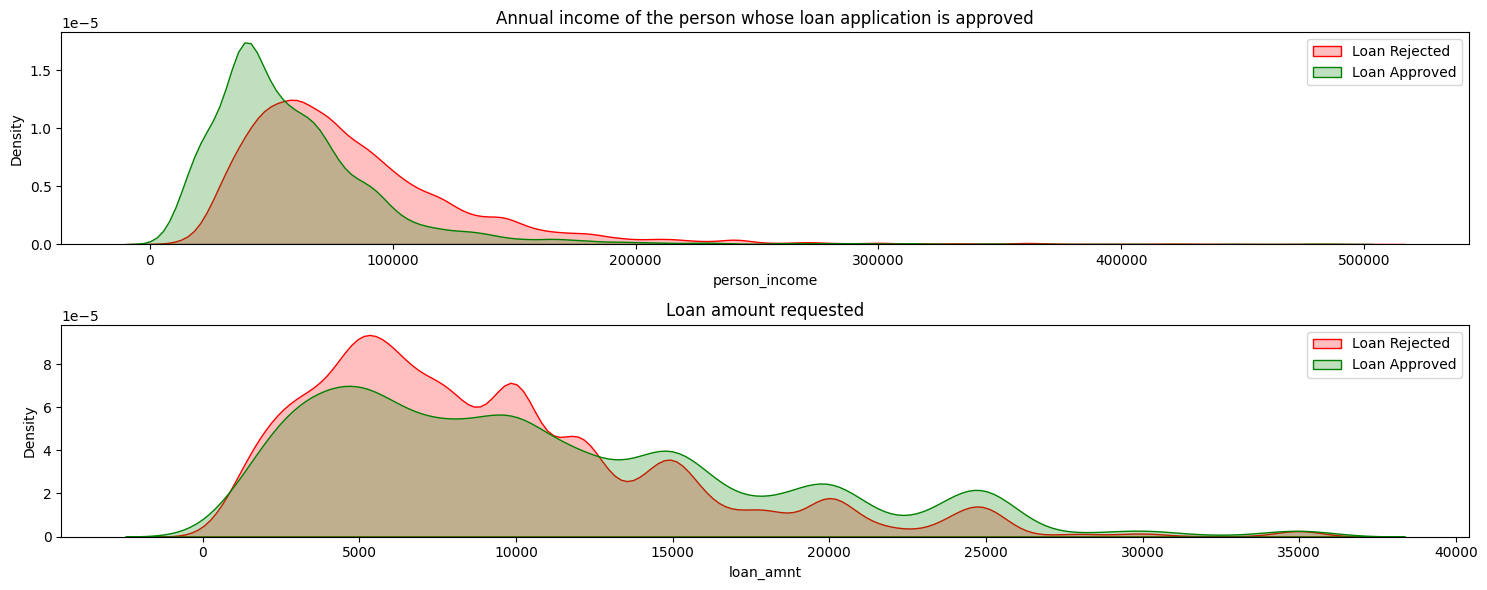

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Annual income of the person whose loan application is approved')
sns.kdeplot(df[(df['loan_status'] == 0)]['person_income'],color='red',fill=True,label='Loan Rejected')
sns.kdeplot(df[(df['loan_status'] == 1)]['person_income'],color='green',fill=True,label='Loan Approved')

plt.legend()

plt.subplot(2,1,2)

plt.title('Loan amount requested')
sns.kdeplot(df[(df['loan_status'] == 0)]['loan_amnt'],color='red',fill=True,label='Loan Rejected')
sns.kdeplot(df[(df['loan_status'] == 1)]['loan_amnt'],color='green',fill=True,label='Loan Approved')

plt.legend()
plt.tight_layout()
plt.show()

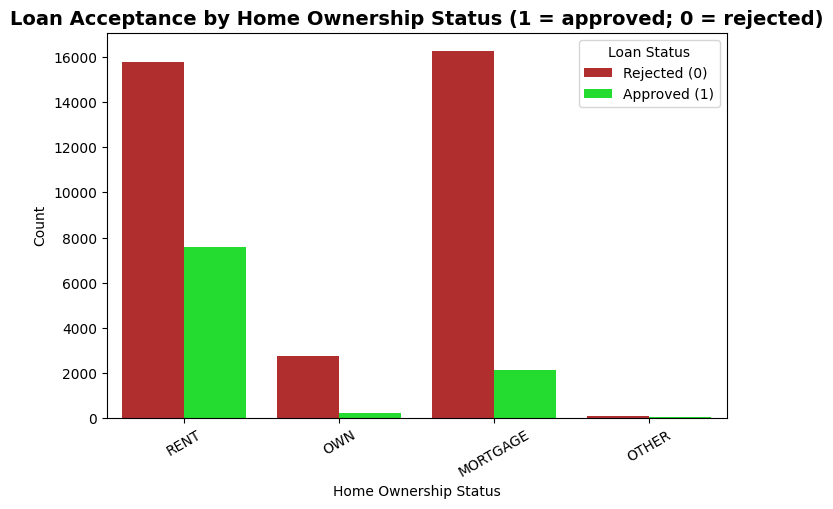

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='person_home_ownership',
    hue='loan_status',
    palette={0:'#c71818', 1:'#05fa15'}
)

plt.title("Loan Acceptance by Home Ownership Status (1 = approved; 0 = rejected)", fontsize=14, fontweight='bold')
plt.xlabel("Home Ownership Status")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Loan Status", labels=["Rejected (0)", "Approved (1)"])
plt.show()

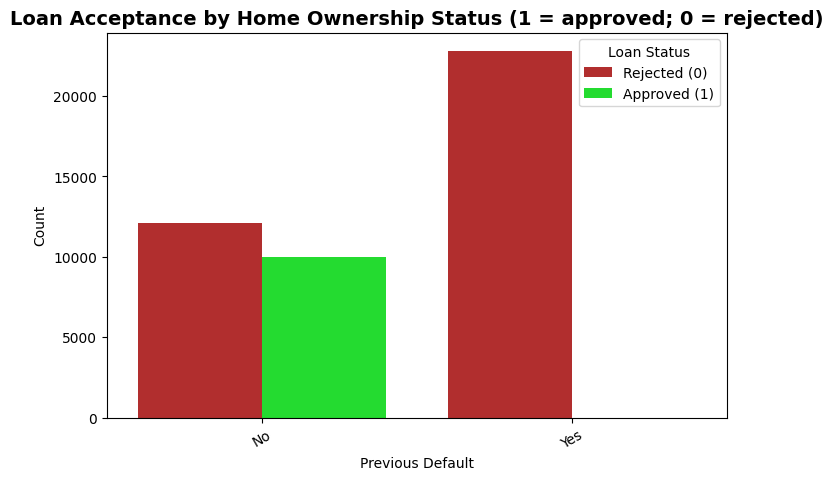

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='previous_loan_defaults_on_file',
    hue='loan_status',
    palette={0:'#c71818', 1:'#05fa15'}
)

plt.title("Loan Acceptance by Home Ownership Status (1 = approved; 0 = rejected)", fontsize=14, fontweight='bold')
plt.xlabel("Previous Default")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Loan Status", labels=["Rejected (0)", "Approved (1)"])
plt.show()

In [ ]:
numerical_cols_yeo = ['person_income']
numerical_cols_minmax = ['person_income', 'loan_amnt']  # note person_income repeated
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

In [ ]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
yeo_pipeline = Pipeline([
    ('yeo', PowerTransformer(method='yeo-johnson'))
])

X_yeo = yeo_pipeline.fit_transform(df[numerical_cols_yeo])
df.loc[:, numerical_cols_yeo] = X_yeo

# --------- Step 2: Apply MinMaxScaler on numerical_cols_minmax ---------
minmax_pipeline = Pipeline([
    ('minmax', MinMaxScaler())
])


In [ ]:
X_minmax = minmax_pipeline.fit_transform(df[numerical_cols_minmax])
df['person_income'] = X_minmax[:, 0]  # scaled person_income
df['loan_amnt'] = X_minmax[:, 1]

# --------- Step 3: Ordinal encode categorical columns ---------
cat_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder())
])


In [ ]:
df[categorical_cols] = cat_pipeline.fit_transform(df[categorical_cols])


In [ ]:
encoder = cat_pipeline.named_steps['ordinal']

category_mapping = {
    col: {cat: i for i, cat in enumerate(cats)}
    for col, cats in zip(categorical_cols, encoder.categories_)
}

print(category_mapping)


{'person_gender': {'female': 0, 'male': 1}, 'person_education': {'Associate': 0, 'Bachelor': 1, 'Doctorate': 2, 'High School': 3, 'Master': 4}, 'person_home_ownership': {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}, 'loan_intent': {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}, 'previous_loan_defaults_on_file': {'No': 0, 'Yes': 1}}


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# --------- Step 5: Apply SMOTE to balance classes ---------
resampler = SMOTE(random_state=42)
X_resampled, y_resampled = resampler.fit_resample(X, y)

# --------- Step 6: Split into train and test sets ---------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.20, random_state=44, shuffle=True)

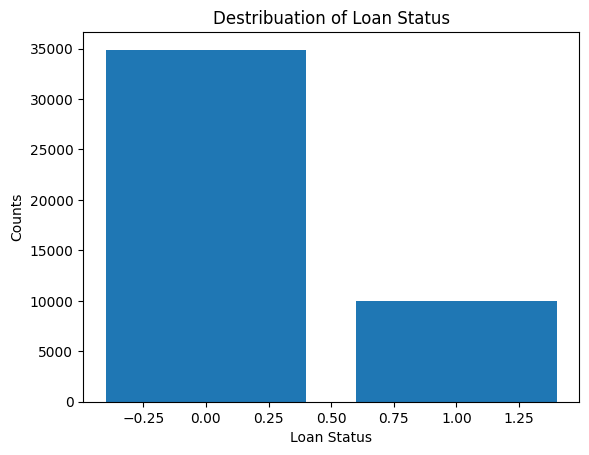

In [ ]:
counts = y.value_counts()
plt.bar(counts.index , counts.values)
plt.title('Destribuation of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.show()

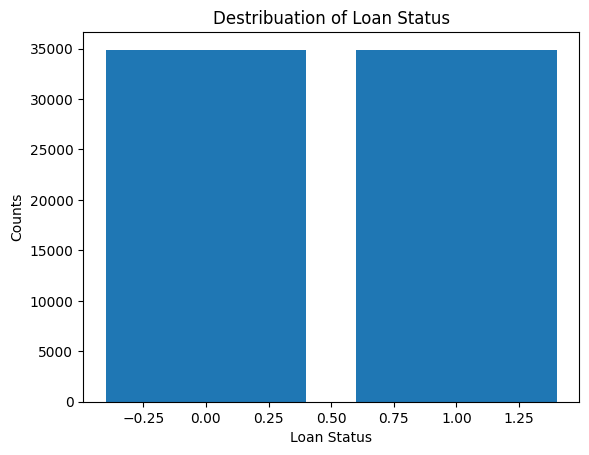

In [ ]:
counts = y_resampled.value_counts()
plt.bar(counts.index , counts.values)
plt.title('Destribuation of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.show()

In [ ]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (55806, 13)
Shape of X_Test (13952, 13)
Shape of Y_Train (55806,)
Shape of Y_Test (13952,)



🔹 Evaluating Logistic Regression...
Accuracy: 0.8863

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      6939
           1       0.85      0.94      0.89      7013

    accuracy                           0.89     13952
   macro avg       0.89      0.89      0.89     13952
weighted avg       0.89      0.89      0.89     13952



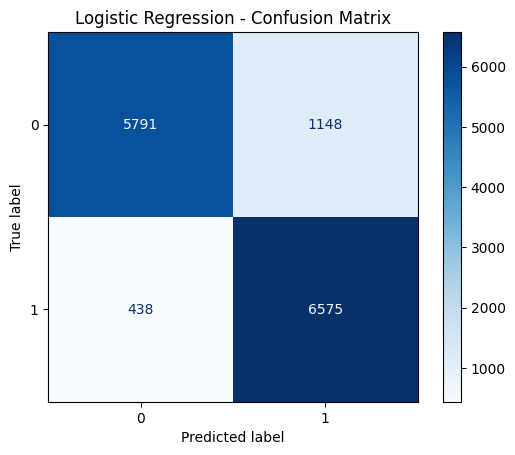


🔹 Evaluating Decision Tree...
Accuracy: 0.9105

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6939
           1       0.91      0.91      0.91      7013

    accuracy                           0.91     13952
   macro avg       0.91      0.91      0.91     13952
weighted avg       0.91      0.91      0.91     13952



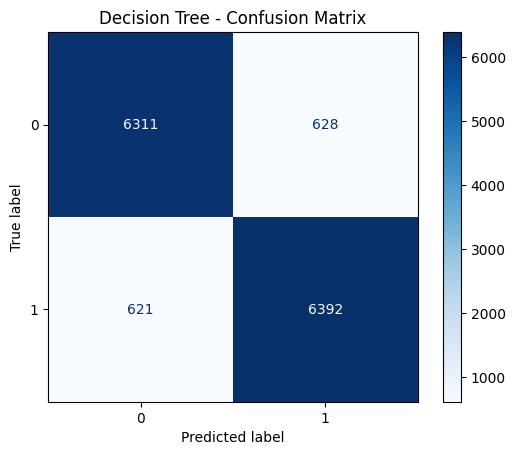


🔹 Evaluating Random Forest...
Accuracy: 0.9495

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      6939
           1       0.95      0.95      0.95      7013

    accuracy                           0.95     13952
   macro avg       0.95      0.95      0.95     13952
weighted avg       0.95      0.95      0.95     13952



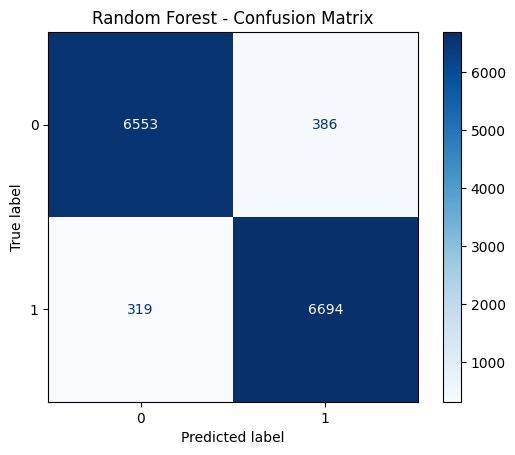


🔹 Evaluating Gradient Boosting...
Accuracy: 0.9339

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6939
           1       0.93      0.94      0.93      7013

    accuracy                           0.93     13952
   macro avg       0.93      0.93      0.93     13952
weighted avg       0.93      0.93      0.93     13952



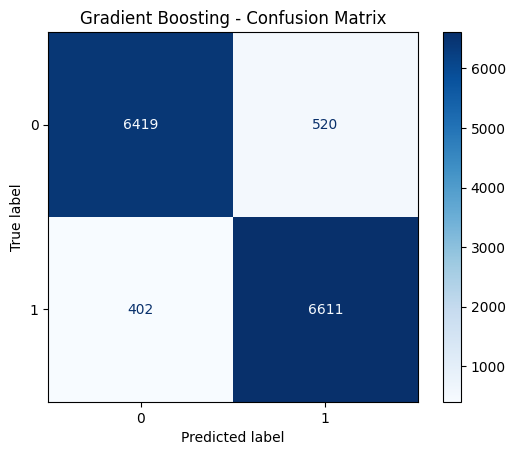


🔹 Evaluating Bagging...
Accuracy: 0.9365

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6939
           1       0.95      0.93      0.94      7013

    accuracy                           0.94     13952
   macro avg       0.94      0.94      0.94     13952
weighted avg       0.94      0.94      0.94     13952



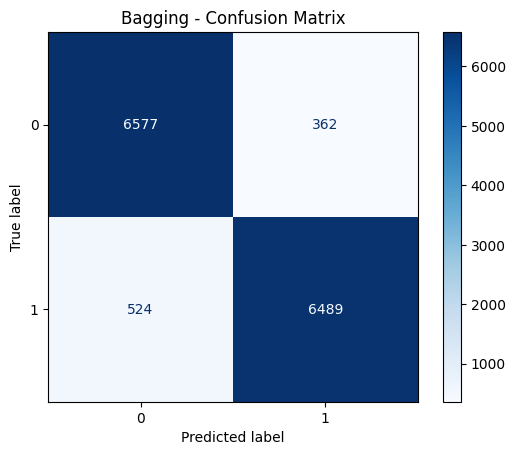


🔹 Evaluating KNN...
Accuracy: 0.8091

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      6939
           1       0.75      0.94      0.83      7013

    accuracy                           0.81     13952
   macro avg       0.83      0.81      0.81     13952
weighted avg       0.83      0.81      0.81     13952



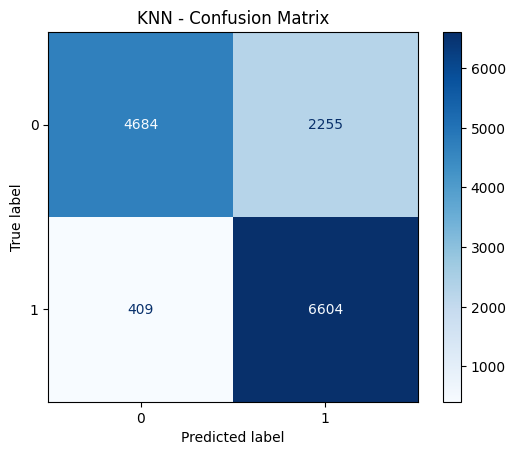


🔹 Evaluating XGBoost...
Accuracy: 0.9557

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6939
           1       0.96      0.95      0.96      7013

    accuracy                           0.96     13952
   macro avg       0.96      0.96      0.96     13952
weighted avg       0.96      0.96      0.96     13952



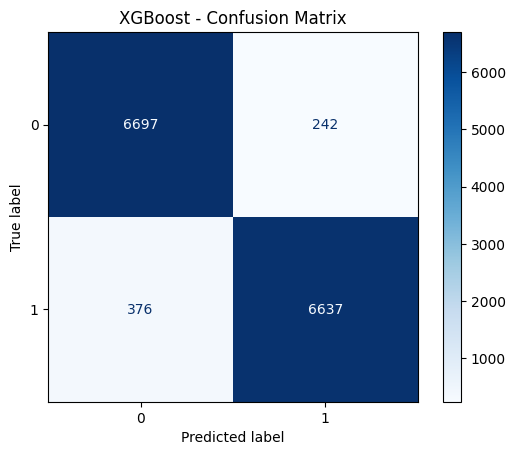


✅ Final Accuracy Scores:
Logistic Regression: 0.8863
Decision Tree: 0.9105
Random Forest: 0.9495
Gradient Boosting: 0.9339
Bagging: 0.9365
KNN: 0.8091
XGBoost: 0.9557


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 📌 Evaluation Function
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models.items():
        print(f"\n🔹 Evaluating {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        results[name] = round(acc, 4)
        print(f"Accuracy: {acc:.4f}")

        # Classification Report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues")
        plt.title(f"{name} - Confusion Matrix")
        plt.show()

    return results

# 📌 Run Evaluation
results = evaluate_models(models, X_train, X_test, y_train, y_test)

# 📌 Print All Results
print("\n✅ Final Accuracy Scores:")
for model, score in results.items():
    print(f"{model}: {score}")

In [ ]:
xgboost = XGBClassifier(
    objective="binary:logistic",
    subsample=0.7,
    max_depth=10,
    learning_rate=0.1,
    gamma=0,
    #colsample_bytree=0.5,
    #eval_metric='logloss'
)

# Train
xgboost.fit(X_train, y_train)

# Predict
y_pred = xgboost.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {acc:.4f}")

XGBoost Accuracy: 0.9547


In [ ]:
y_train_pred = xgboost.predict(X_train)
y_test_pred  = xgboost.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"XGBoost Training Accuracy: {train_acc:.4f}")
print(f"XGBoost Testing Accuracy:  {test_acc:.4f}")

XGBoost Training Accuracy: 0.9820
XGBoost Testing Accuracy:  0.9547


In [ ]:
joblib.dump(xgboost, "xgboost_model.pkl")

print("✅ Model saved as xgboost_model.pkl")


✅ Model saved as xgboost_model.pkl


In [ ]:
df.sample(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
6621,22.0,1.0,4.0,0.496193,4,3.0,0.159420,5.0,5.42,0.10,3.0,565,0.0,0
1815,22.0,0.0,1.0,0.371515,0,2.0,0.159420,5.0,7.49,0.16,4.0,590,0.0,0
10435,23.0,1.0,0.0,0.542874,0,0.0,0.034783,0.0,16.77,0.02,4.0,509,0.0,1
24553,32.0,1.0,1.0,0.587849,8,0.0,0.171014,0.0,11.01,0.07,10.0,641,0.0,0
25548,33.0,0.0,3.0,0.622920,12,0.0,0.420290,5.0,16.49,0.14,9.0,675,0.0,0
